In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight = pd.read_csv('Airline_cleaned.csv')

In [3]:
flight=flight.drop(columns='Unnamed: 0')

In [4]:
flight.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,22:20,0.0,No info,3897.0,24.0,3.0,2019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,05:50,2.0,No info,7662.0,1.0,5.0,2019.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,09:25,2.0,No info,13882.0,9.0,6.0,2019.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,18:05,1.0,No info,6218.0,12.0,5.0,2019.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,16:50,1.0,No info,13302.0,1.0,3.0,2019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
flight['Dep_Hour'] = flight['Dep_Time'].str.split(':').str[0]
flight['Dep_Minute'] = flight['Dep_Time'].str.split(':').str[1]

In [6]:
flight['Dep_Hour'] = flight['Dep_Hour'].astype('float')
flight['Dep_Minute'] = flight['Dep_Minute'].astype('float')

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does thedataset have?

In [7]:
rows = flight.shape[0]
columns = flight.shape[1]

print(f"Number of rows are {rows} and number of columns are {columns}")

Number of rows are 10681 and number of columns are 38


### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

<AxesSubplot:xlabel='Price', ylabel='Count'>

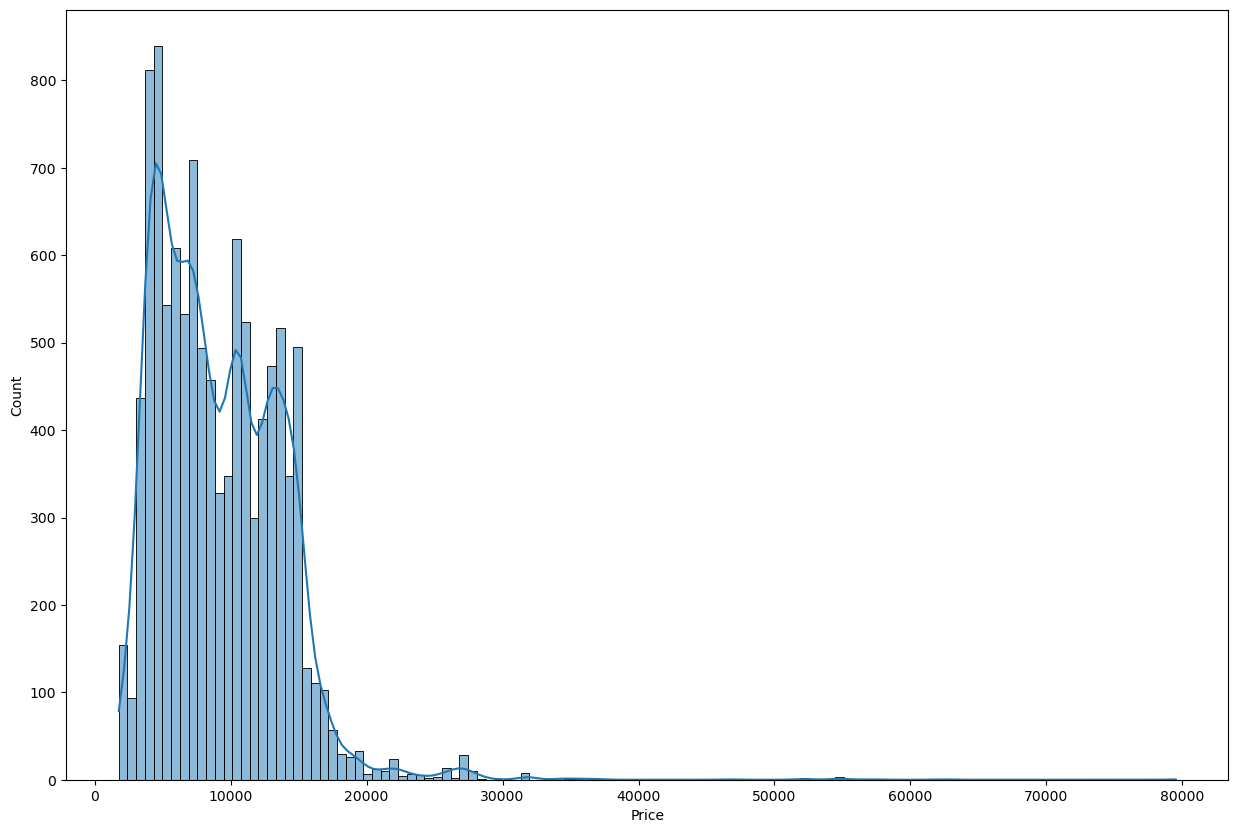

In [8]:
plt.figure(figsize=(15,10))
sns.histplot(data = flight, x = 'Price', kde=True)

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [9]:
flight['Price'].describe()

count    10681.000000
mean      9086.043067
std       4611.029347
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [10]:
min_price = flight["Price"].min()
max_price = flight["Price"].max()
print(f"Minimum Price is : {min_price} and maximum price is : {max_price}")

Minimum Price is : 1759.0 and maximum price is : 79512.0


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

<AxesSubplot:xlabel='Price', ylabel='Airline'>

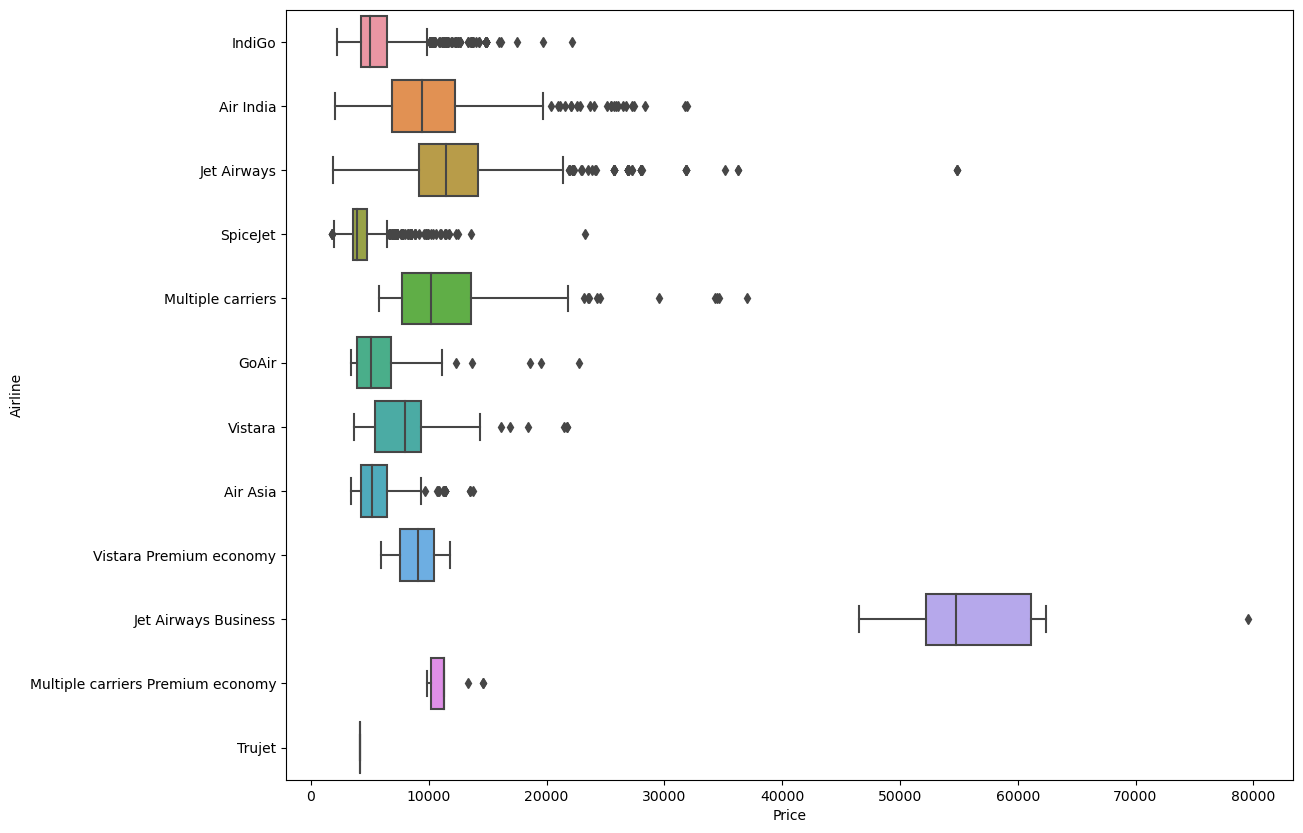

In [11]:
plt.figure(figsize=(13,10))
sns.boxplot(data = flight, y = 'Airline', x = 'Price')

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<AxesSubplot:xlabel='Price', ylabel='Airline'>

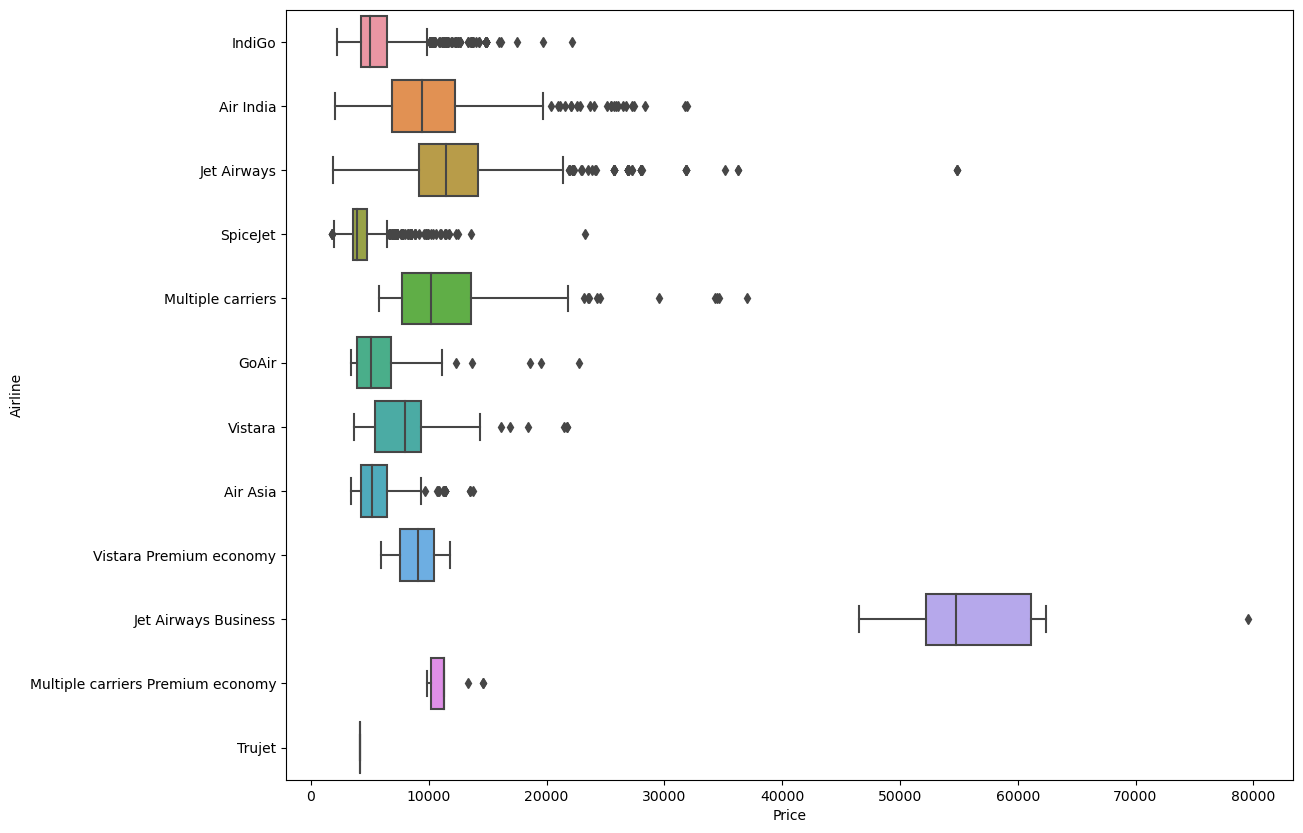

In [12]:
plt.figure(figsize=(13,10))
sns.boxplot(data = flight, y = 'Airline', x = 'Price')

Data Distribution: Outliers may indicate that your data does not follow a normal distribution. This can affect the assumptions of some statistical tests.

Statistical Analysis: Outliers can influence summary statistics like the mean and standard deviation, making them less representative of the central tendency and spread of the data.

Machine Learning Models: Outliers can negatively impact the performance of machine learning models, especially those sensitive to extreme values. You may consider removing or transforming outliers, depending on the context.

Data Integrity: Outliers may also indicate errors or anomalies in your data collection process. It's essential to investigate the cause of outliers to ensure data integrity.

To handle outliers, you can consider various strategies, such as removing them, transforming them, or using robust statistical methods that are less sensitive to outliers. The approach depends on your specific analysis goals and domain knowledge.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss? 

<AxesSubplot:ylabel='Month'>

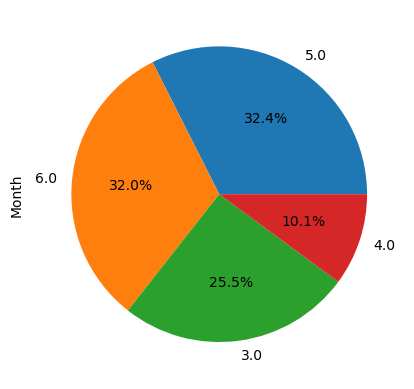

In [13]:
flight['Month'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

According to the data the pick session or month for Aviation industry are May and June because 65% of people are travaling in these months

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

Text(0.5, 1.0, 'Price Variation by Duration of Flight')

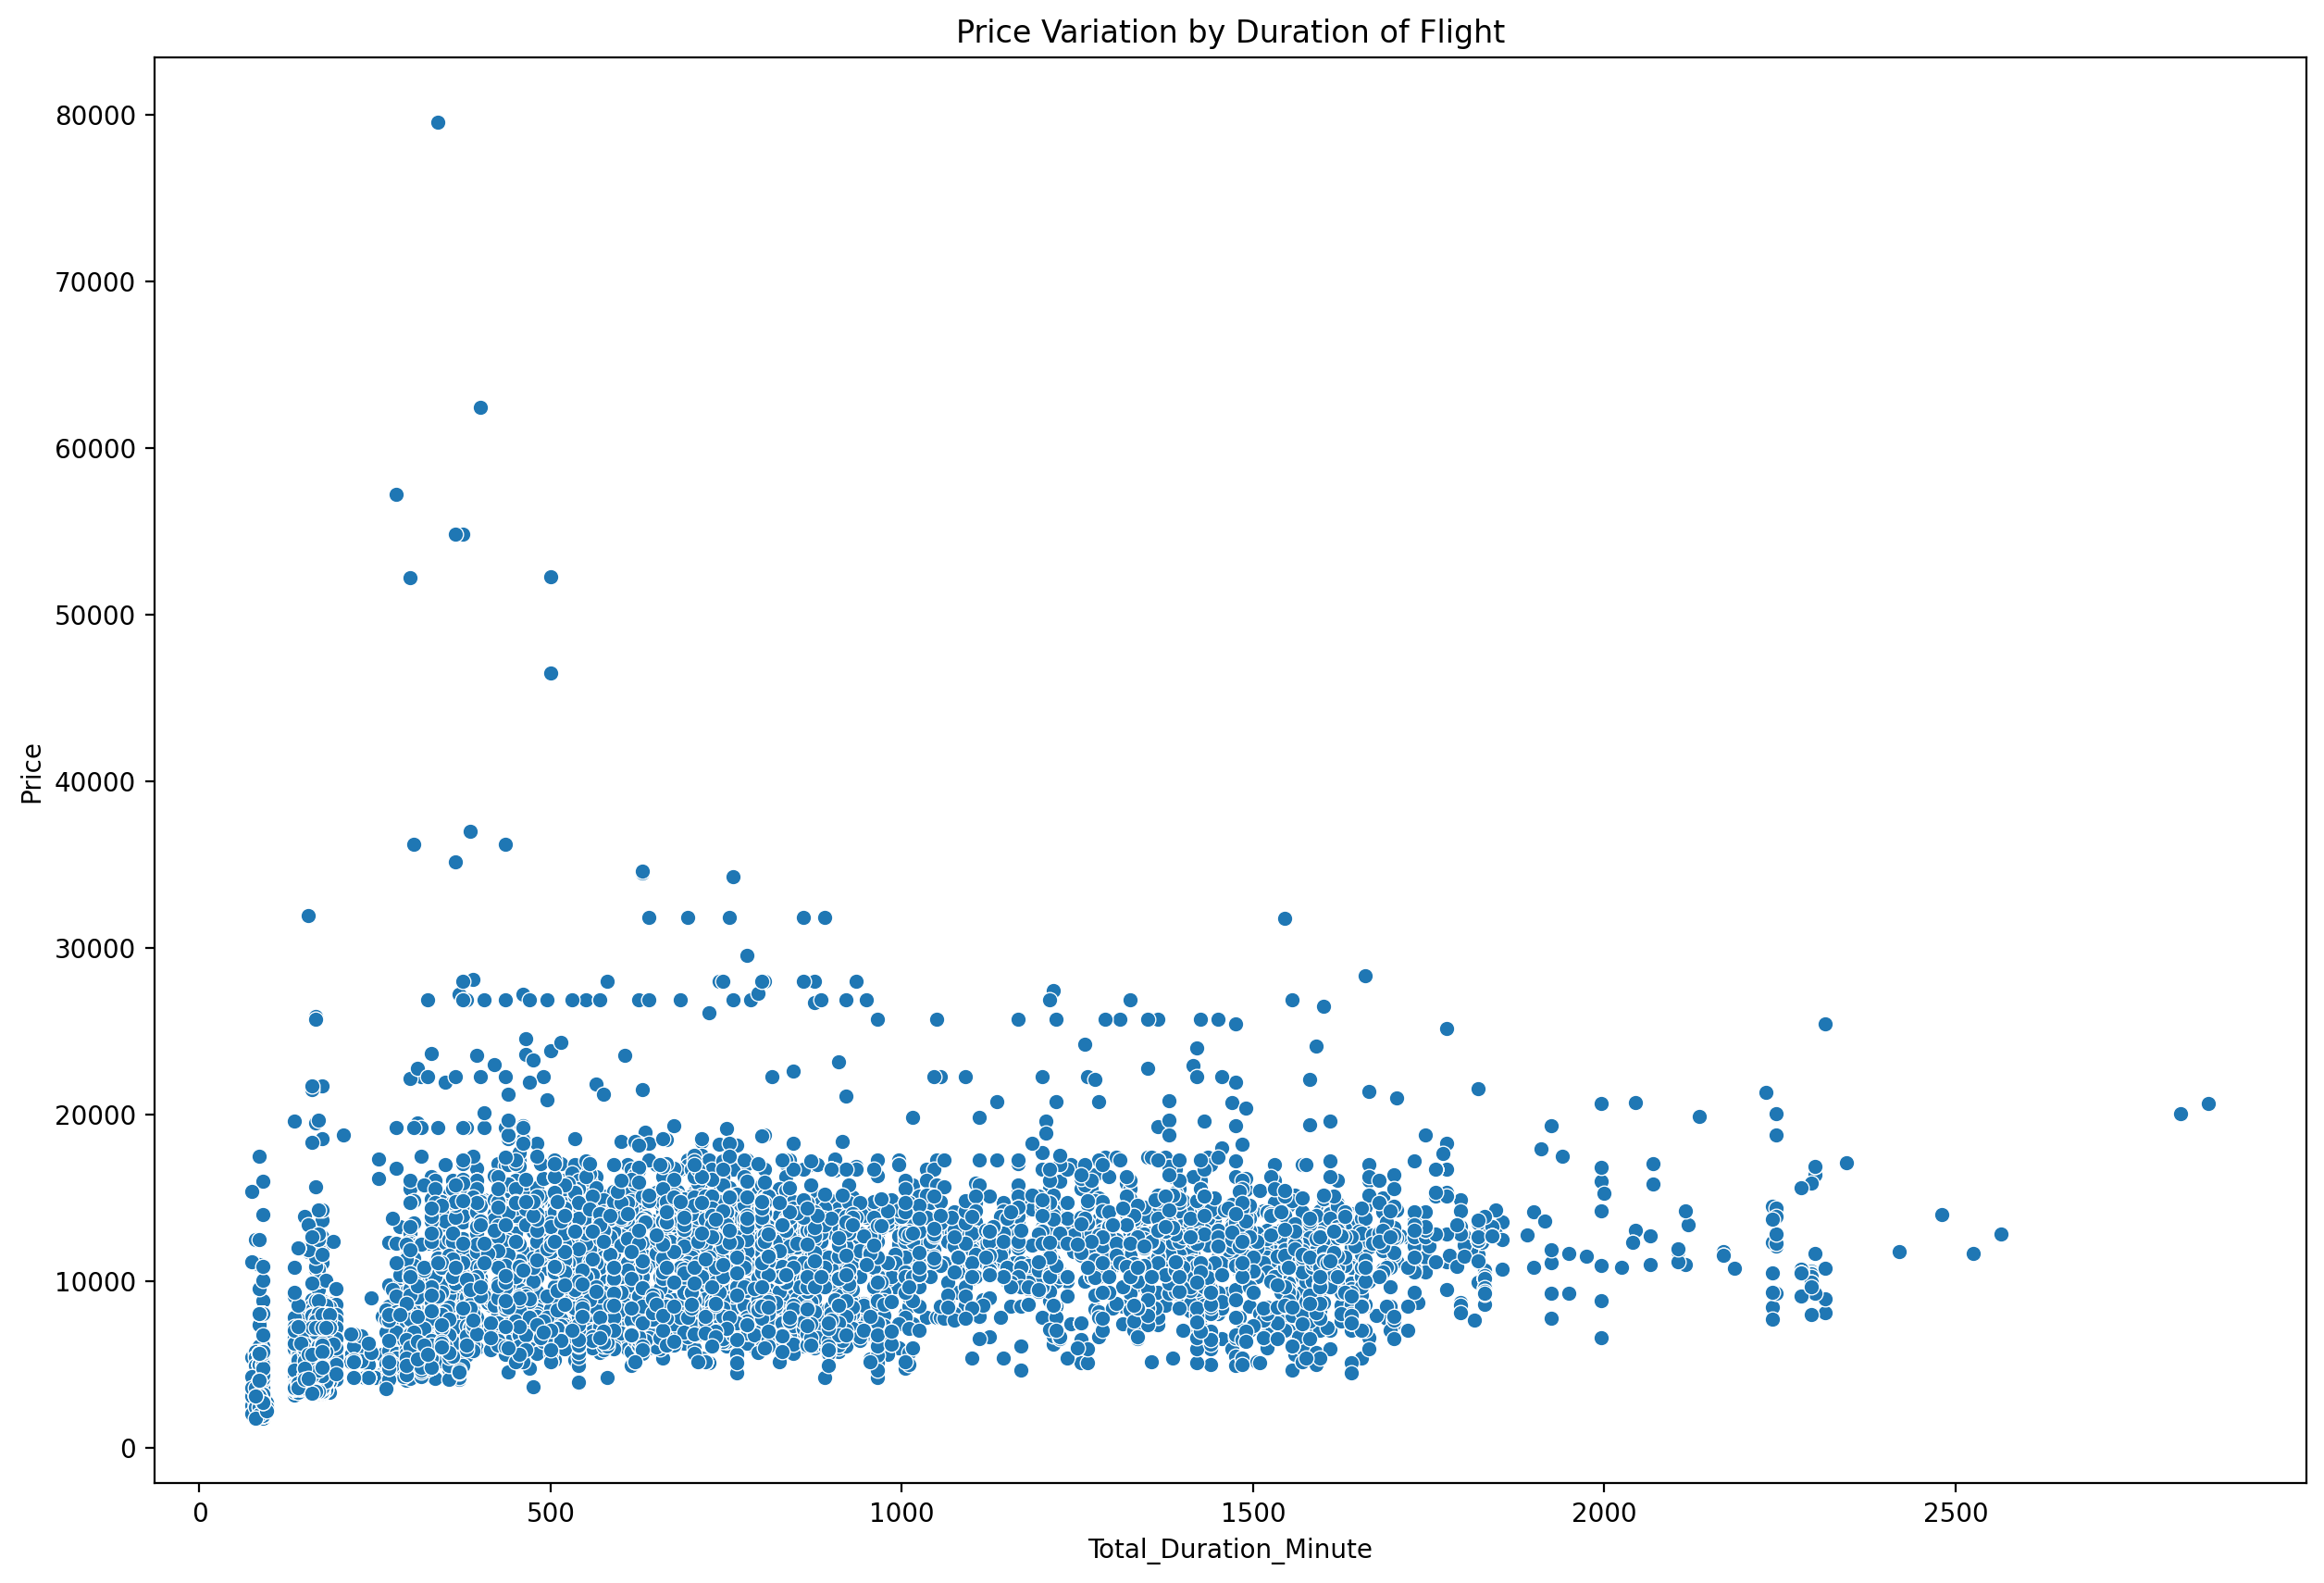

In [14]:
plt.figure(figsize=(15,10), dpi=200)
sns.scatterplot(data = flight, x='Total_Duration_Minute', y = 'Price')
plt.title('Price Variation by Duration of Flight')

Text(0.5, 1.0, 'Price by Destination')

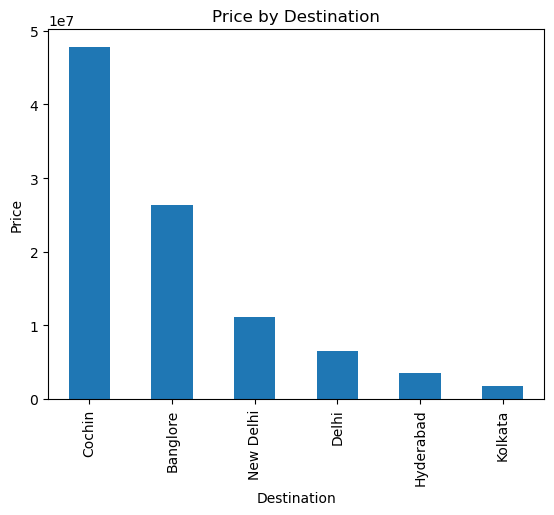

In [20]:
flight.groupby('Destination').sum()['Price'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Price")
plt.title("Price by Destination")

Text(0.5, 1.0, 'Price by Source')

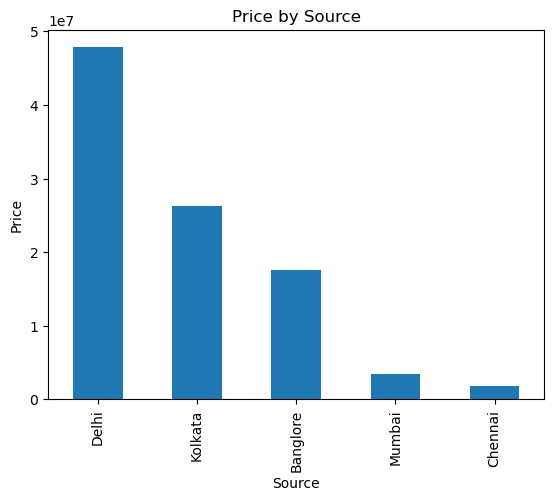

In [21]:
flight.groupby('Source').sum()['Price'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Price")
plt.title("Price by Source")

To identify the peak travel season from the Flight Price dataset, we can analyze the following features:

1. **Departure Date**: This feature can help us identify the months or seasons when most people travel. We can group the data by month or season and calculate the average ticket price for each group. The months or seasons with the highest average ticket price can be considered as peak travel seasons.

2. **Destination**: This feature can help us identify the most popular travel destinations and the corresponding peak travel seasons. We can group the data by destination and calculate the average ticket price for each group. The destinations with the highest average ticket price can be considered as peak travel destinations.

3. **Airline**: This feature can help us identify the airlines that are in high demand during peak travel seasons. We can group the data by airline and calculate the average ticket price for each group. The airlines with the highest average ticket price can be considered as popular airlines during peak travel seasons.

4. **Flight Duration**: This feature can help us identify the preferred flight duration during peak travel seasons. We can group the data by flight duration and calculate the average ticket price for each group. The flight durations with the highest average ticket price can be considered as preferred flight durations during peak travel seasons.

To present our findings to our boss, we can create a report that includes a summary of our analysis, visualizations of our findings, and recommendations based on our analysis. We can use a line chart to show how ticket prices vary over time, a bar chart to show how ticket prices vary by destination, and a pie chart to show how ticket prices are distributed among different airlines ¹. We can also provide recommendations on how to adjust pricing strategies based on our findings.


### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

When analyzing the Flight Price dataset to identify factors that affect flight prices, you would typically follow these steps:

Data Exploration and Preprocessing:

Start by loading and inspecting the dataset.
Check for missing values and outliers.
Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
Explore summary statistics, distributions, and correlations among variables.
Feature Selection:

Identify the features that are likely to affect flight prices based on domain knowledge. These could include:
Departure and arrival locations (cities, airports).
Airline carriers.
Date and time of travel.
Duration of the flight.
Number of layovers or stops.
Class of service (economy, business, first).
Additional services or amenities.
Use feature selection techniques (e.g., correlation analysis, feature importance from tree-based models) to prioritize the most relevant features.
Data Visualization:

Create visualizations to explore the relationships between flight prices and various features. For example:
Scatter plots to visualize price vs. numeric variables like flight duration.
Box plots to compare price distributions across different airlines or flight classes.
Bar plots to show average prices by departure city or airline.
Time series plots to analyze price trends over time.
Statistical Analysis:

Conduct statistical tests or analyses to quantify the impact of different features on flight prices. For instance:
ANOVA or t-tests to compare price means across categories (e.g., different airlines).
Regression analysis to build a predictive model that includes relevant features.
Machine Learning Modeling (Optional):

If your goal is to predict flight prices, you can build a machine learning model using regression techniques. This model can be used to estimate prices based on input features.
Reporting Findings:

Prepare a report or presentation for the management team, summarizing your findings. Include:
A list of key factors affecting flight prices based on your analysis.
Visualizations to support your findings.
Insights into how different variables impact prices.
Recommendations or strategies for optimizing pricing or marketing based on the analysis.
Discussion:

Present your findings to the management team, explaining the implications for business decisions.
Be prepared to answer questions and provide additional insights based on your analysis.
Remember that the specific factors affecting flight prices may vary depending on the dataset and the airline industry's dynamics. Therefore, domain knowledge and collaboration with stakeholders are crucial for a comprehensive analysis.

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [23]:
google = pd.read_csv('googled_cleaned.csv', )
rows = google.shape[0]
columns = google.shape[1]

print(f"Number of rows are {rows} and number of columns are {columns}")

Number of rows are 10840 and number of columns are 17


### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

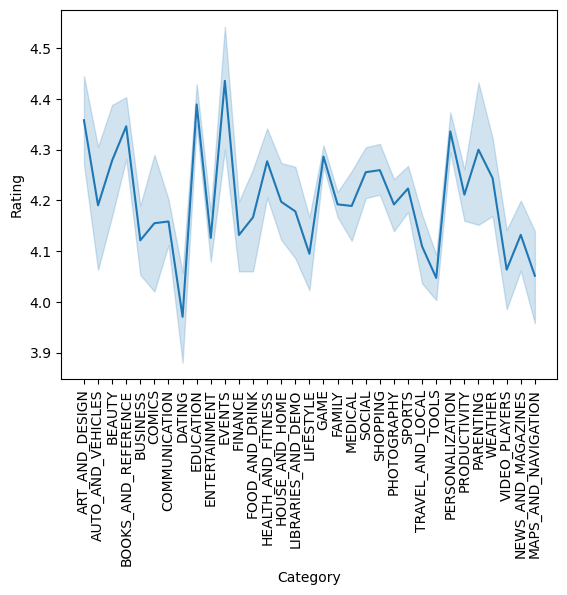

In [31]:
# google = google.drop(columns='Unnamed: 0')
sns.lineplot(data = google, x = 'Category', y = 'Rating')
plt.xticks(rotation=90);

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [38]:
google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_kb           1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

Missing values in a dataset can significantly impact the analysis. If we ignore the missing values, we may end up with biased or incorrect results. On the other hand, if we remove the observations with missing values, we may lose valuable information and reduce the sample size ¹. 

To handle missing values in a dataset, we can use various strategies such as deleting the missing values, imputing the missing values, or using "missingness" as a feature ¹³. Deleting the missing values is a straightforward approach, but it may not be suitable for large datasets or datasets with many missing values ¹. Imputing the missing values is another approach that involves replacing the missing values with estimated values based on other observations in the dataset ¹³. However, this approach may introduce bias or reduce the accuracy of the analysis if the imputation method is not appropriate for the dataset ¹. Using "missingness" as a feature is a more advanced approach that involves creating a new variable that indicates whether an observation has missing values or not ¹.

In summary, missing values in a dataset can impact our analysis by introducing bias or reducing accuracy. Therefore, it is important to handle them appropriately using suitable strategies such as deleting the missing values, imputing the missing values, or using "missingness" as a feature.

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

<AxesSubplot:xlabel='Size_kb', ylabel='Rating'>

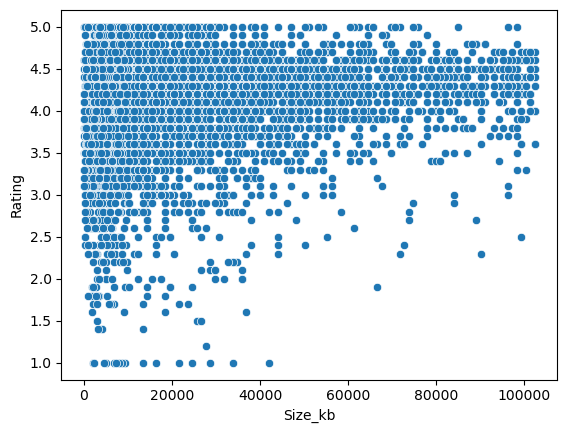

In [40]:
sns.scatterplot(data=google, y = 'Rating', x = 'Size_kb')

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

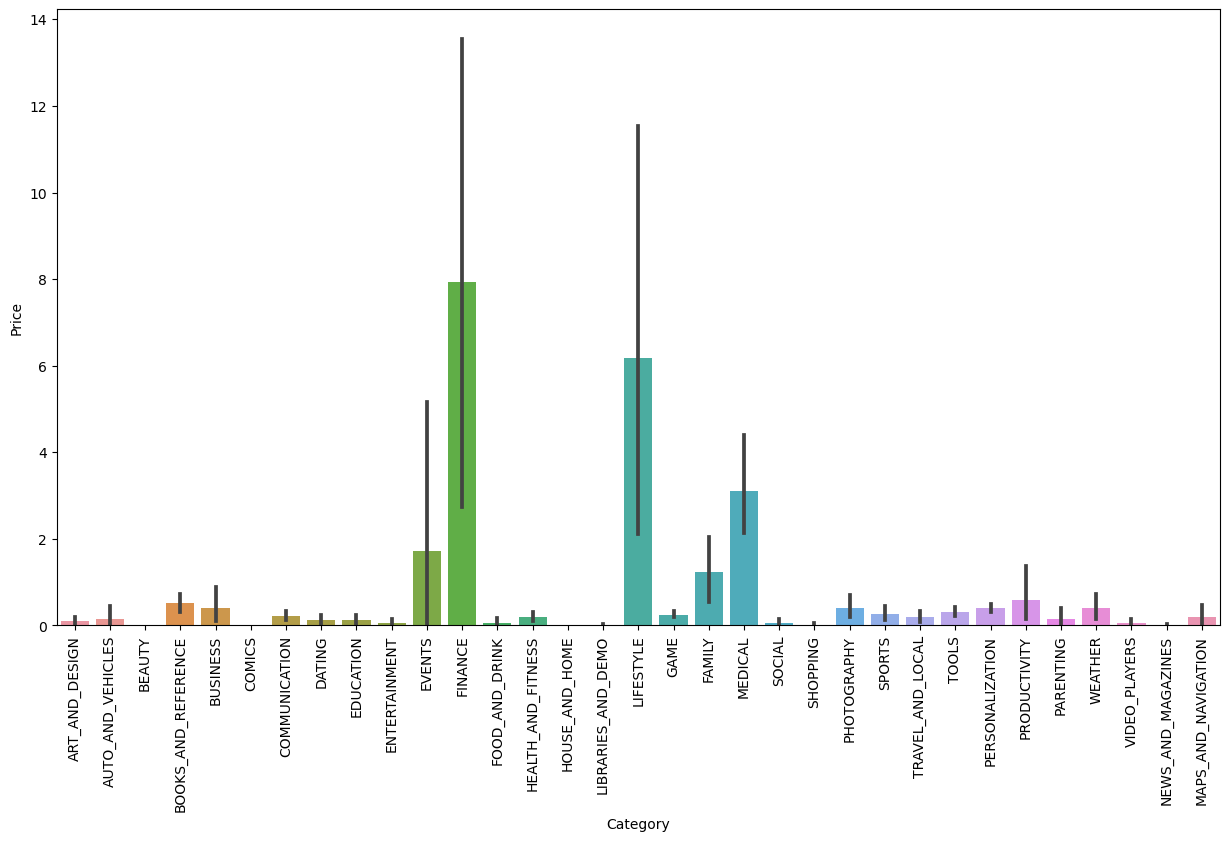

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(data = google, x = 'Category', y = 'Price' )
plt.xticks(rotation=90);

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [52]:
google.groupby("App").sum()['Installs'].sort_values(ascending=False).head(10)

App
Subway Surfers                  6000000000
Google News                     4000000000
Hangouts                        4000000000
Google Drive                    4000000000
Google Photos                   4000000000
Instagram                       4000000000
Candy Crush Saga                3500000000
Maps - Navigate & Explore       3000000000
Google Chrome: Fast & Secure    3000000000
WhatsApp Messenger              3000000000
Name: Installs, dtype: int64

In [54]:
google['App'].value_counts().head(10)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories on the Google Playstore and make recommendations to the company, you can follow these steps using the given dataset:

Data Exploration:

Start by loading and inspecting the dataset to understand its structure and contents.
Check for any missing values and handle them appropriately.
Data Cleaning:

Ensure that the data is clean and consistent. Address any data quality issues.
Convert columns like "Size_kb" to appropriate numerical formats.
Data Visualization:

Create visualizations to explore the dataset and understand the distribution of app categories. Use plots such as bar charts, pie charts, or histograms.
Visualize the distribution of app ratings, installs, and other relevant features.
Feature Selection:

Identify the features that are relevant to determining the popularity of app categories. Key features might include:
Category: The primary category of the app.
Rating: User ratings of the app.
Installs: Number of app installations.
Reviews: Number of user reviews.
Size_kb: Size of the app.
You may also want to consider the "Content Rating" and "Genres" columns for additional insights.
Data Aggregation:

Group the dataset by app category and aggregate relevant features. Calculate summary statistics like average ratings, total installs, and total reviews for each category.
Ranking Categories:

Rank the app categories based on your chosen popularity metric (e.g., average ratings or total installs). You can use Python libraries like Pandas to sort and rank the categories.
Visualization of Findings:

Create visualizations to present your findings. For example, a bar chart or a heatmap can show the ranking of app categories based on popularity.
Recommendations:

Based on your analysis, provide recommendations to the company regarding which app categories are the most popular on the Google Playstore.
Consider the company's goals, target audience, and the competition in each category when making recommendations.
Further Analysis (Optional):

If the company is interested in specific insights, you can conduct further analyses. For instance, you might explore the relationship between app size and popularity or analyze how ratings affect installs.
Report and Presentation:

Prepare a report or presentation summarizing your analysis, findings, and recommendations. Use visuals and clear explanations to convey your insights effectively.
Discussion:

Present your findings and recommendations to the company and be prepared to answer any questions or provide additional insights based on your analysis.
Remember that the definition of "popularity" can vary. It could be based on ratings, installs, or other metrics. Ensure that your analysis aligns with the company's specific definition of popularity.

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Playstore dataset, you can analyze several features and use appropriate data visualizations to present your findings. Here's how you can approach this task:

Features to Analyze:

Developer Name: Start by analyzing the developer names. Identify the developers with the most apps on the Playstore.

Number of Apps: Calculate the total number of apps each developer has published on the Playstore. This is a direct indicator of a developer's activity.

Average App Rating: Calculate the average app rating for each developer. This can indicate the overall quality of their apps.

Total Installs: Calculate the total number of app installations for each developer. This reflects the popularity of their apps.

Total Reviews: Calculate the total number of user reviews for each developer. A higher number of reviews may indicate user engagement.

Category/Genre Distribution: Analyze the distribution of app categories or genres for each developer. Are they specialized in a specific category or genre?

Data Visualizations:

Bar Chart: Create a bar chart to show the top developers based on the number of apps they've published. This provides a quick overview of the most active developers.

Histogram: Create a histogram to visualize the distribution of average app ratings among developers. You can identify developers with consistently high ratings.

Scatter Plot: Use a scatter plot to visualize the relationship between the number of apps published and the total number of installs. This can help identify developers with a high volume of installations.

Pie Chart: Create a pie chart to show the distribution of app categories or genres for a specific developer or the top developers. This illustrates their specialization.

Heatmap: Generate a heatmap to visualize correlations between features. For example, you can check if there's a correlation between the number of apps and the total number of reviews.

Stacked Bar Chart: Use a stacked bar chart to show the distribution of developer names within specific categories or genres. This can reveal which developers dominate certain niches.

Box Plot: Create box plots to visualize the distribution of average ratings for the top developers. This helps identify outliers or developers with consistently high or low ratings.

Time Series Plot: If the dataset includes information about the last update date of each app, create a time series plot to visualize the trend in app development for the top developers over time.

Recommendations:

Based on your analysis and data visualizations, you can make recommendations to the mobile app development company. For example, you can recommend collaborating with developers who have a track record of publishing high-quality apps with consistently high ratings and a significant number of installs. Additionally, you can identify specific categories or genres where the company might consider entering the market based on the success of other developers in those areas.

The choice of features and visualizations should align with the company's definition of "successful" developers, which may vary based on their goals and criteria.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore, you can analyze several features and use appropriate data visualizations to present your findings. Here's how you can approach this task:

Features to Analyze:

Day, Month, Year: These columns provide the timestamp of when each app was last updated. You can use this information to identify patterns in app launches.
Data Visualizations:

Line Plot or Time Series Plot: Create a line plot or time series plot to visualize the number of app launches over time. You can group the data by month or year to identify trends and seasonality.

Bar Chart: Generate a bar chart to show the distribution of app launches across different months or days of the week. This can help identify specific days or months when app launches are more common.

Histogram: Create a histogram to visualize the distribution of app launches by year. This can help identify if there are significant changes or trends in app launches over the years.

Box Plot: Use a box plot to visualize the distribution of app launches by month or day of the week. This can help identify outliers or patterns in launch timing.

Heatmap: Generate a heatmap to visualize the correlation between the day of the week, month, or year and the number of app launches. This can reveal which time periods are associated with higher app launches.

Pie Chart: Create a pie chart to show the distribution of app launches across different months or days. This can provide a clear overview of which months or days are more popular for app launches.

Scatter Plot: Use a scatter plot to visualize the relationship between the day of the week, month, or year and the number of app installations. This can help identify patterns in user behavior.

Recommendations:

Based on your analysis and data visualizations, you can make recommendations to the marketing research firm regarding the best time to launch a new app:

Identify peak months or days: Highlight the months or days of the week when app launches are most frequent. These periods may indicate higher user engagement or less competition from other apps.

Consider seasonality: If you observe seasonality in app launches, recommend launching the app during periods of high activity or demand. For example, if there's a consistent increase in launches during the holiday season, consider launching during that time.

Analyze historical trends: Look for trends in app launches over the years. Identify whether there has been a consistent increase in launches or if there are specific years that stand out as particularly active.

User behavior insights: Use scatter plots to understand how user behavior (e.g., app installations) correlates with the timing of launches. This can provide insights into when users are more likely to engage with new apps.

Competition analysis: Consider analyzing the competition's launch patterns to identify gaps in the market when launching your app could lead to a competitive advantage.

The choice of features and visualizations should align with the company's goals and objectives for app launch timing.